<center>
<img src="../../img/ods_stickers.jpg">
## Обнаружение мошенничества с кредитными картами
<center>Индивидуальный проект. Автор: Александр Евгеньевич Ширкин. Slack: @panchos39
<center>https://www.kaggle.com/mlg-ulb/creditcardfraud

### 1. Описание набора данных и признаков

В данном проекте решается задача поиска мошенничества в множестве транзакций с кредитных карт. В наше время, когда большинство деловых сделок совершается электронным способом, все банки заинтересованы в безопасности счетов своих клиентов, и быстрая реакция на мошеннические сделки позволит улучшить качество услуг предоставляемых банком и престижность банка для вкладчиков

Датасет содерижит транзакции сделанные европейцами с кредитных карт с сентября 2013-го года.  В датасете присутствуют такие транзакции, которые проходили в течении двух дней, и из них 492 мошеннические и 284,807 легальные. Данный набор данных очень несбалансирован, целевой класс (мошенничество) составляет всего лишь 0.172% от доли всех транзакций.

В данных содержатся только вещественные признаки, которые являются результатом PCA преобразования. К сожалению, из за проблем с конфедициальностью, в данных нет оригинальных признаков и другой косвенной информации о данных. Единственные признаки, которые не были преобразованы, это 'Time' и 'Amount'.

<b>Признаки V1, V2, ..., V28 - главные компоненты, полученные после преобразования PCA исходных признаков.</b> 

 

<b>Признак 'Time' содержит время в секундах между каждой транзакцией и самой первой транзакцией в наборе данных.</b>

<b>Признак 'Amount' - это объем транзакции. Данный признак может использоваться для обучения с учетом издержек классификации.</b>

<b>Признак 'Class' - целевая переменная, она принимает значение 1 - если транзакция имеет мошеннический характер, и 0 - если транзакция легальная</b>


### 2. Первичный анализ данных

#### Подключаем библиотеки

In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, validation_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
sns.set_style("darkgrid")
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from scipy.sparse import hstack, vstack
import warnings
warnings.filterwarnings('ignore')

#### Считываем наш набор данных

In [2]:
PATH_TO_DATA = '../../data/creditcard/'
RANDOM_STATE = 17

In [3]:
data = pd.read_csv(os.path.join(PATH_TO_DATA, 'creditcard.csv.zip'))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


#### Теперь исследуем набор данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

1. Мы можем увидеть, что структурно данные состоят из 284,807 строк и 31 столбца.
2. Все признаки вещественные, кроме целевой целочисленной переменной
3. В данных нет пропусков.
4. Время также представленно в виде вещественного числа и представляет время в секундах с начала первой транзакции

Признак 'Time' не так хорошо интерпретируется, когда время дано в секундах. Давайте предположим, что транзакции начинаются с 00:00 и заканчиваются в 23:59. Таким образом переведем секунды в часы дня

In [4]:
data['hour'] = data['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)

Т.к. данные собраны с европейского банка, то будет логичным судить, что часовые пояса в Европейских странах не сильно смещены относительно друг друга, и должно оправдаться предположение, что с 1 часа ночи до 5 утра должно наблюдаться сокращение числа транзакций(ночное время) и примерно с 6 часа снова начинается повышение числа транзакций. Проверем наше предположение при помощи сводной таблицы

In [97]:
data.pivot_table(values='Amount',index='Class',columns='hour',aggfunc='count')

hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Class,,,,,,,,,,,,,,,,,,,,,
0,10919,7687,4212,3269,3476,2185,2979,4093,7219,10266,...,15350,16545,16434,16435,16135,17003,15632,16739,17692,15424
1,21,6,10,57,17,23,11,9,23,9,...,17,23,26,22,29,33,19,18,16,9


Как мы можем увидеть, наше предположение оправдалось. С достаточно большой долей уверенности мы можем судить о том, что данные действительно начинаются с 00:00, и мы можем оправданно создать признак, время в часах. В следующем разделе мы визуально подтвердим наше предположение

In [57]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727,14.124593
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,6.230831
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,10.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,15.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,19.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,23.000000


In [36]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

- Мы видим явный  сильный дисбаланс в распределении целевой переменной

- Посмотрим на распределение целевой переменной в процентном соотношении

In [4]:
def transaction_dist(labels) :
    # now let us check in the number of Percentage
    Count_Normal_transacation = len(labels[labels ==0 ])
    Count_Fraud_transacation = len(labels[labels == 1])
    Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
    print("Процентное соотношение легальных транзакций",Percentage_of_Normal_transacation*100)
    Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
    print("Процентное соотношнеие мошеннических транзакций",Percentage_of_Fraud_transacation*100)

In [61]:
transaction_dist(data["Class"])

Процентное соотношение легальных транзакций 99.82725143693798
Процентное соотношнеие мошеннических транзакций 0.1727485630620034


- Теперь мы убедились, что, действтительно, доля мошеннических транзакций составляет всего лишь 0.172% от всех транзакций, что очень мало. 
- Это говорит о сильном дисбалансе в распределении целевой переменной
- Для качественного обучения необходимо использовать методы балансирования выборки , либо взвешивание в модели

Посмотрим как признаки коррелируют друг с другом. Построим матрицу корреляций Пока исключим целевую переменную

In [66]:
data.drop('Class', axis=1).corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hour
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,0.301966
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,0.009576
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,-0.018719
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.021597
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,-0.031109
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.033059
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.016437
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.004471
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.021649
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.173724


Признаков достаточно много, и тяжело судить о взаимодействии признаков без визуализации. Но в данный момент мы можем увидеть следующее, 
- признаки V1, V2, ..., V28 абсолютно не коррелируют друг с другом
- Это частично подтверждает тот факт, что признаки являются главными компонентами PCA преобразования, т.к. главные компоненты PCA преобразования являются линейно независимыми векторами, и каждый вектор описывает свою долю дисперсии в данных

Посмотрим как признаки коррелируют с целевой переменной. Исключим признак 'Time', т.к. мы его рассмотрим отдельно

In [67]:
data.drop(['Class'], axis=1).corrwith(data['Class']).sort_values(axis=0)

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
hour     -0.016708
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
dtype: float64

Можем увидеть , что есть признаки, которые достаточно сильно трицательно коррелируют, и признаки, которые положительно коррелируют с целевой переменной, но не так сильно. Будем считать корреляцию значимой, если |corr| > 0.1

Среди отрицательных корреляций можем выделить признаки( выберем порог, где корреляция меньше 0.1)
- V17, V14, V12, V10, V16, V3, V7, V18, V1

Cреди положительных корреляций (выберем порог, где корреляция больше 0.1)
- V4, V11

Разумеется это наши первые предположения о влиянии признаков на целевую переменную и мы пока не делаем общих выводов. 

Возможно окажется так, что есть комбинации признаков, которые будут коррелировать намного сильнее, чем текущие показатели

### 3. Первичный визуальный анализ данных



Построены визуализации (распределения признаков, матрица корреляций и т.д.), описана связь с анализом данным (п. 2). Присутствуют выводы;

Посмотрим на распределение целевой переменной

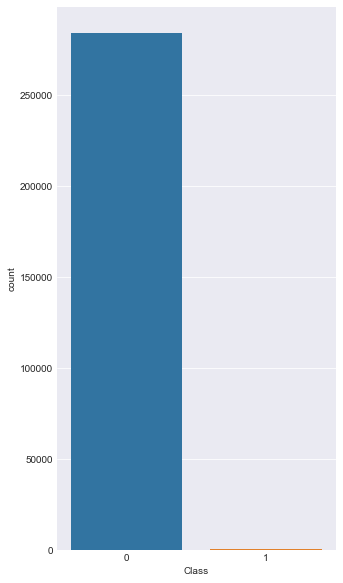

In [77]:
plt.figure(figsize=(5, 10))
sns.countplot("Class",data=data)
plt.show()

- Теперь мы можем визуально подтвердить, что в данных наблюдается сильный дисбаланс распределения целевой переменной
- Процентное соотношение легальных транзакций 99.82725143693798 %
- Процентное соотношнеие мошеннических транзакций 0.1727485630620034 %
- Для обучения необходима балансировка выборки

Посмотрим, как распределн объем транзакция на легальные и мошеннические транзакции

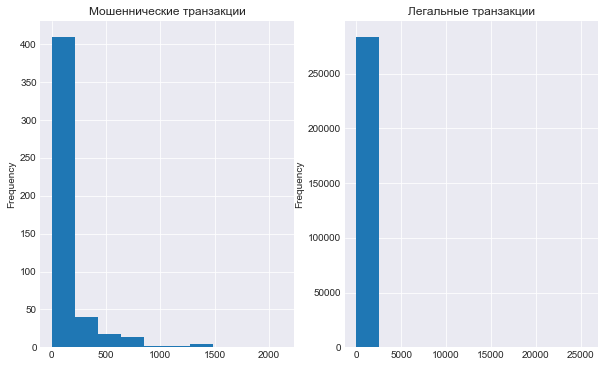

In [174]:
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
Fraud_transacation.Amount.plot.hist(title="Мошеннические транзакции")
plt.subplot(1,2,2)
Normal_transacation.Amount.plot.hist(title="Легальные транзакции")
plt.show()

- Распределение легальных транзакций трудно интерпретировать. 
- Судя по гистограмме, все легальные транзакции проходят объемом меньше 2.5 тысяч у.е
- Уточним данные для гистограммы, ограничив объем транзакции 2.5 к. у.е

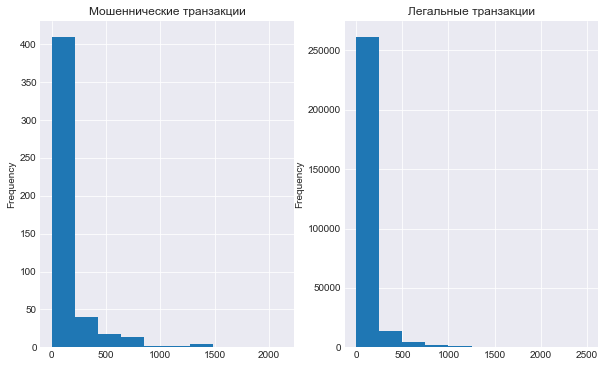

In [175]:
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
Fraud_transacation[Fraud_transacation["Amount"]<= 2500].Amount.plot.hist(title="Мошеннические транзакции")
plt.subplot(1, 2, 2)
Normal_transacation[Normal_transacation["Amount"]<=2500].Amount.plot.hist(title="Легальные транзакции")
plt.show()

Вывод :
- по объему транзакций на долю легальных и мошеннических транзакций мы не видим каких то явных закономерностей
- По объему транзакций нельзя строго судить о характере проведенной операции

<b>Посмотрим, как распределены легальные и мошеннические транзакции по часам дня</b>

In [108]:
def PlotHistogramHour(df,norm):
    bins = np.arange(df['hour'].min(),df['hour'].max()+2)
    plt.figure(figsize=(15,4))
    sns.distplot(df[df['Class']==0.0]['hour'],
                 norm_hist=norm,
                 bins=bins,
                 kde=False,
                 color='b',
                 hist_kws={'alpha':.5},
                 label='Легальные')
    sns.distplot(df[df['Class']==1.0]['hour'],
                 norm_hist=norm,
                 bins=bins,
                 kde=False,
                 color='r',
                 label='Мошеннические',
                 hist_kws={'alpha':.5})
    plt.xticks(range(0,24))
    plt.legend()
    plt.show()

Частотная гистограма Легальных/Мошеннических транзакций на каждый час дня


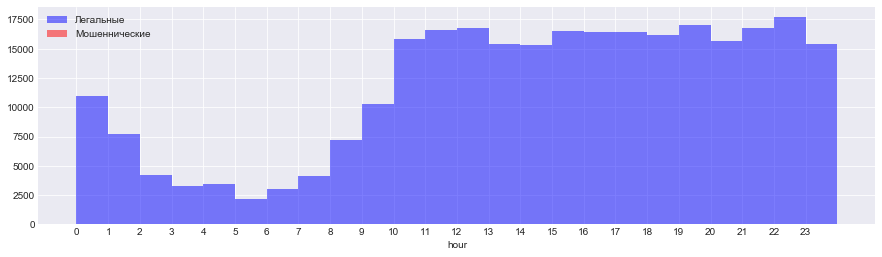

*На гистограмме не видно мошеннических транзакций, т.к. их очень мало, необходимо нормализовать гистограммы.

Нормализованная гистограма Легальных/Мошеннических транзакций на каждый час дня


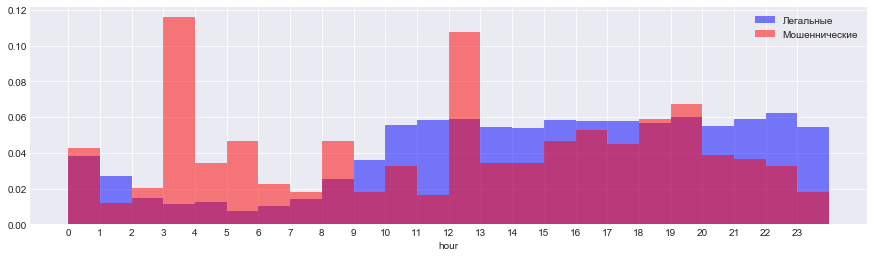

In [109]:
print('Частотная гистограма Легальных/Мошеннических транзакций на каждый час дня')
PlotHistogramHour(data,False)
print('*На гистограмме не видно мошеннических транзакций, т.к. их очень мало, необходимо нормализовать гистограммы.\n')
print('Нормализованная гистограма Легальных/Мошеннических транзакций на каждый час дня')

PlotHistogramHour(data,True)

Вывод: 
- время, когда была совершена транзакция, несомненно вносит определенный вклад в целевую переменную, и есть предпоссылки для того, чтобы ее использовать в модели. 
- Возможно это будет не сам час, а какой то конкретный интервал суток, например, ночь, что видно по нормализованной гистограмме

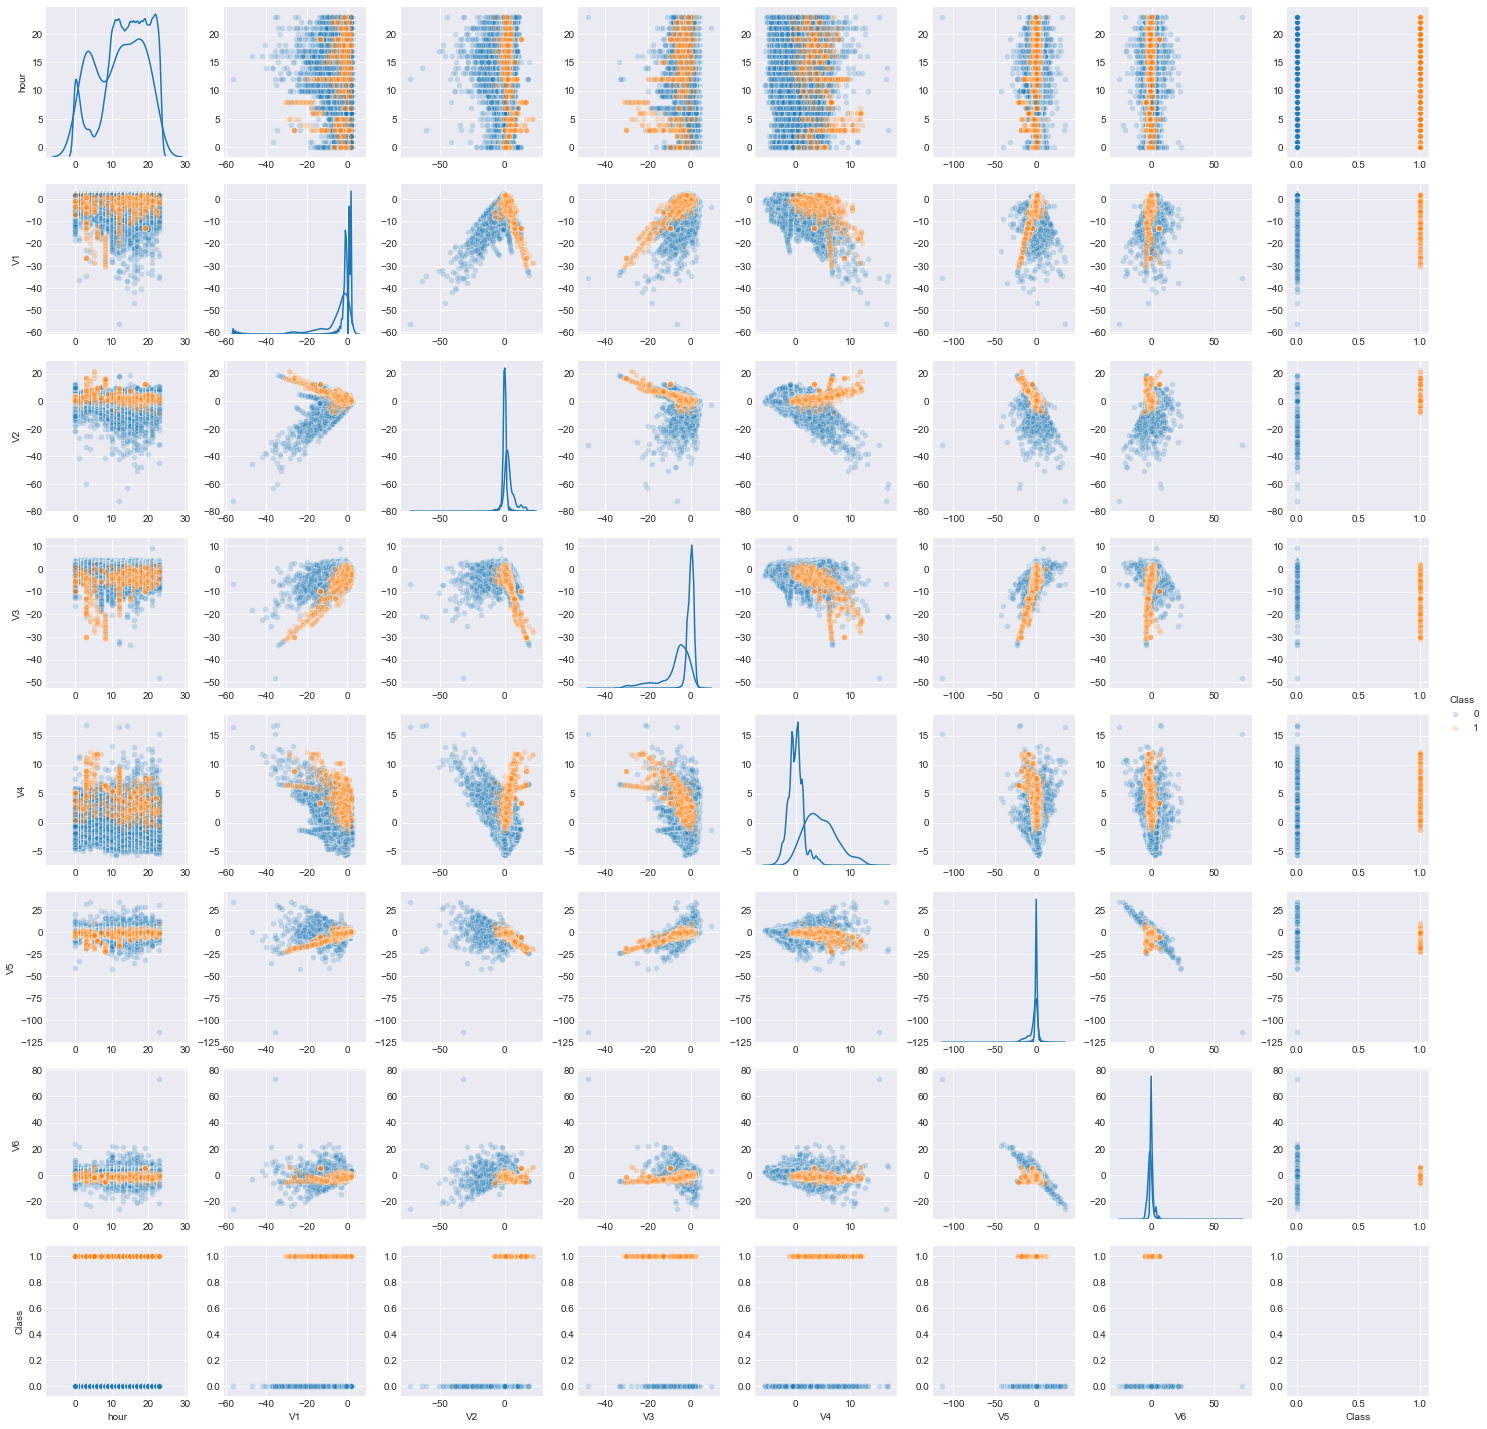

In [181]:
sns.pairplot(data=pd.concat([data.loc[:,'hour'],data.loc[:,'V1':'V6'],data.loc[:,'Class']],axis=1),
             hue='Class',
             diag_kind='kde',
             plot_kws={'alpha':0.2})
plt.show()

### 4. Инсайты, найденные зависимости

- Мы выяснили, время в секундах начинается с полуночи (с 00:00), значит можно справедливо определить время в часах, когда была совершена транзакция
- Мы выяснили, что наблюдается повышенная мошенническая активность в ночное время суток

### 5. Выбор метрики

Для того что определить метрику качества для нашей задачи нужно обратить внимание на следующие факторы:
1. Какая решается задача
2. Сколько классов
3. Присутствует ли дисбаланс в распределении целевого признака
4. Какова главная цель решения задачи

Так как мы решаем задачу бинарной классификации, то имеет смысл рассматривать следующие метрики:
    
1. Accuracy = TP+TN/Total - доля верных ответов
2. Precison = TP/(TP+FP) - Точность
3. Recall = TP/(TP+FN) - Полнота
4. AUROC - Area Under ROC - Площадь под ROC кривой
5. F-score - F-мера (Взвешенное среднее точности и полноты)


- TP = True possitive - Истинные срабатываня
- TN = True negative - Истинные пропуски
- FP = False possitve - Ложные срабатывания
- FN= False Negative - Ложные пропуски

1. Так как мы наблюдаем явный дисбаланс в распределении целевой переменной, то доля верных ответов не подходит для оценки качества модели. Мы можем получить достаточно большую долю верных ответов, если просто скажем, что все транзакции легальные
2. Точность - более подходящая метрика оценки, но в данной задаче стоит обратить внимание на то, что нам более важно, точно определять мошеннические транзакции, при этом не охватывая их все полностью, либо же мы охватываем все мошеннические транзакции, но некоторые транзакции ошибочно считаем мошенническими, хотя они являются легальными
3. Полнота - для интересов банков, наиболее важный параметр в данной задаче является полнота, т.к. не будет серьезных последствий, если мы предупредим клиента о возможности мошеннических операций на его счете, даже если их на самом деле нет, клиент все равно будет доволен, что банк следит за его активами, в обратном же случае, мы упускаем много потенциальных мошеннических транзакций, и клиент может остаться не доволен услугами банка. Поэтому полнота является адекватной метрикой качества модели, но есть еще один подходящий вариант.
4. Площадь под ROC кривой - хорошая метрика, если мы стремимся равноценно хорошо увеличивать как Точность, так и Полноту, но в нашем случае, это может привести к очень хорошей точности, но при этом Полнота будет немного меньше, хотя в нашем случае, намного лучше будет, если Полнота будет больше.
5. F-мера - можно сказать идеальная метрика для данной задачи, т.к. мы можем указать приоритет, в чем мы больше нуждаемся, в Точности или Полноте, и получить результат, который будет учитывать как Точность, так и Полноту, но при этом больший приоритет будет отдаваться Полноте.

Из наших рассуждений следует, что самые подходящие метрики качества для данной задачи:
- Полнота
- F-мера c приоритетом к Полноте

### 6. Выбор модели




Мы решаем задачу классификации, соответственно в качестве модели могут подойти следующие:

1. Логистическая регрессия
2. Случайный лес
3. Градиентный бустинг
4. Нейронные сети

В наше задаче нет особых ограничений на применение различных моделей.
* Признаков не много, т.е. методы основанные на деревьях решений подходят
* Признаки масштабированы, и не коррелируют друг с другом, также можно применять логистическую регрессию
* Нейронные сети также можно применить, но лично по моему мнению, данный тип моделей будет слишком избыточен, т.к. можно построить достаточно адекватную модель с хорошим отбором признаков, следуя принципу Бритвы Окама. Чем проще, тем лучше. В добавок мы получим эффективность на стадии production, если обратим интерес к более элементарным алгоритмам


### 9. Создание новых признаков и описание этого процесса 

Мы создали новый признак - час дня

In [5]:
data['hour'] = data['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)

Описание предпосыок к этому признаку было рассмотрено выше

### 7. Предобработка данных


Мы проделаем следующие действия с нашими данными:
- Отмасштабируем признак Amount для логистической регрессии
- Применеим One Hot Encoding преобразование к признаку hour
- Также рассмотрим два подхода работы с несбалансированными выборками: OverSampling и UnderSampling, и посмотрим, что работает лучше
- Признак Time уберем из выборки, т.к. он не несет статистической значимости, мы определили более полезный признак, время в часах, что лучше описывает данные
- Остальные признаки оставим без изменений, так как они и так являются результатом PCA преобразования

In [6]:
X, y = data.drop(['Class', 'Time'], axis=1), data['Class']

In [7]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1.0


In [8]:
train_size = 0.7
n = X.shape[0]

Разделим наши данные на обучающую и тестовую выборку, причем сохраним порядок появляения данных, т.е. в тестовой выборке у нас присутствуют только более поздние данные, чтобы наша модель могла определять мошеннические транзакции на разных временных промежутках

In [9]:
X_train, y_train = X.iloc[:int(n * train_size)], y.iloc[:int(n * train_size)]
X_test, y_test = X.iloc[int(n * train_size):], y.iloc[int(n * train_size):]

In [10]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1.0


In [11]:
transaction_dist(y_train)

Процентное соотношение легальных транзакций 99.80738749222527
Процентное соотношнеие мошеннических транзакций 0.19261250777472363


In [12]:
transaction_dist(y_test)

Процентное соотношение легальных транзакций 99.8735999438222
Процентное соотношнеие мошеннических транзакций 0.12640005617780276


In [13]:
ss = StandardScaler()
X_train.Amount = pd.Series(ss.fit_transform(X_train.Amount.values.reshape(-1, 1)).flatten(), name="Amount", index=X_train.index)
X_test.Amount = pd.Series(ss.transform(X_test.Amount.values.reshape(-1, 1)).flatten(), name="Amount", index=X_test.index)

In [14]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hour
199364,-1.504565,-1.047164,2.658591,-0.246340,0.342667,0.182682,-0.424257,0.300896,0.638538,-0.658241,...,0.371965,0.798937,-0.048231,-0.437821,0.412388,-0.085327,-0.131134,-0.127378,0.115739,13.0
199365,2.152590,-0.900447,-1.092456,-0.994969,-0.613447,-0.760012,-0.530218,-0.222248,-0.214416,0.746967,...,-0.281725,-0.987236,0.358646,-0.782338,-0.480245,-0.647930,-0.023563,-0.044354,-0.135877,13.0
199366,1.811278,0.224393,0.542888,3.606222,-0.162910,1.171241,-0.874598,0.419449,-0.546470,1.493825,...,0.109290,0.345703,0.365984,0.663253,-0.531272,-0.225013,0.032563,-0.022693,-0.357482,13.0
199367,-1.524832,-0.544095,-0.288824,-0.916791,3.524219,-1.830070,1.375925,-0.814647,-0.648070,-0.072189,...,0.272832,1.245119,-0.867245,0.838885,0.860487,-0.081074,-0.252743,-0.377957,-0.236515,13.0
199368,0.099135,0.873164,-0.362487,-0.612234,0.747229,-0.629384,0.755890,0.126794,-0.051667,-0.613531,...,-0.302759,-0.840999,0.115856,0.613080,-0.528392,0.092546,0.207960,0.071553,-0.353505,13.0


Применим One Hot Encoding для признака hour

In [15]:
ohe = OneHotEncoder(categorical_features='all')
time_ohe_train = ohe.fit_transform(X_train['hour'].values.reshape(-1, 1))
time_ohe_test = ohe.transform(X_test['hour'].values.reshape(-1, 1))

In [16]:
X_train_csr = hstack((X_train.drop('hour', axis=1).values, time_ohe_train))
X_test_csr = hstack((X_test.drop('hour', axis=1).values, time_ohe_test))

In [18]:
X_test_csr.shape

(85443, 53)

#### Реализуем два метода борьбы с несбалансированностью в распределении целевой переменной
#### UnderSampling и OverSampling
#### И протестируем какой из методов будет лучше работать

In [19]:
rus = RandomUnderSampler(random_state=17, return_indices=True)
ros = RandomOverSampler(random_state=17,  ratio='minority')

In [26]:
X_train_undersampled, y_train_undersampled, idx_train = rus.fit_sample(X_train_csr, y_train)
X_train_oversampled, y_train_oversampled = ros.fit_sample(X_train_csr, y_train)

In [27]:
type(X_train_undersampled)

scipy.sparse.csr.csr_matrix

In [29]:
print ("UnderSampling")
transaction_dist(y_train_undersampled)
print ("--------------------------------------------------------")
print ("OverSampling")
transaction_dist(y_train_oversampled)

UnderSampling
Процентное соотношение легальных транзакций 50.0
Процентное соотношнеие мошеннических транзакций 50.0
--------------------------------------------------------
OverSampling
Процентное соотношение легальных транзакций 50.0
Процентное соотношнеие мошеннических транзакций 50.0


### 8. Кросс-валидация и настройка гиперпараметров модели

- Проведем кросс валидацию для логистической регрессии как для UnderSampling так и OverSampling
- будем перебирать различные значения параметра регуляризации C
- В качестве метода разбиения, возьмем стратифицированный, т.к. нам необходимо сохранить баланс классов в каждом фолде
- в случае с OverSampling поставим количество фолдов равное 5-ти, а в UnderSampling - 3-м, т.к. данныых очень мало, и большое количество фолдов может повлиять на качество обучения
- Для воспроизводимости решения, зафиксируем seed равный 17-ти

In [54]:
lr = LogisticRegression(random_state=17, n_jobs=-1)

In [33]:
skf = StratifiedKFold(n_splits=3, random_state=17, shuffle=True)

In [34]:
grid_params = {'C' : np.linspace(start=0.0001, stop=10, num=50)}

In [35]:
grid_under = GridSearchCV(estimator=lr, param_grid=grid_params, cv=skf, n_jobs=-1, scoring='recall', verbose=10)
grid_over = GridSearchCV(estimator=lr, param_grid=grid_params, cv=skf, n_jobs=-1, scoring='recall', verbose=10)

In [36]:
grid_under.fit(X_train_undersampled, y_train_undersampled)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1758s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0390s.) Setting batch_size=20.
[Parallel(n_jobs=-1)]: Done  71 out of 150 | elapsed:    2.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=17, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-04, 2.04180e-01, 4.08259e-01, 6.12339e-01, 8.16418e-01,
       1.02050e+00, 1.22458e+00, 1.42866e+00, 1.63274e+00, 1.83682e+00,
       2.04090e+00, 2.24498e+00, 2.44906e+00, 2.65313e+00, 2.85721e+00,
       3.06129e+00, 3.26537e+00, 3.46945e+00, 3.67353e+00, 3.87761e... 8.77552e+00, 8.97960e+00,
       9.18368e+00, 9.38776e+00, 9.59184e+00, 9.79592e+00, 1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=10)

In [37]:
grid_over.fit(X_train_oversampled, y_train_oversampled)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  6.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=17, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-04, 2.04180e-01, 4.08259e-01, 6.12339e-01, 8.16418e-01,
       1.02050e+00, 1.22458e+00, 1.42866e+00, 1.63274e+00, 1.83682e+00,
       2.04090e+00, 2.24498e+00, 2.44906e+00, 2.65313e+00, 2.85721e+00,
       3.06129e+00, 3.26537e+00, 3.46945e+00, 3.67353e+00, 3.87761e... 8.77552e+00, 8.97960e+00,
       9.18368e+00, 9.38776e+00, 9.59184e+00, 9.79592e+00, 1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=10)

In [38]:
grid_under.best_score_, grid_under.best_params_

(0.9713541666666666, {'C': 0.0001})

In [39]:
grid_over.best_score_, grid_under.best_params_

(0.9375263845612625, {'C': 0.0001})

Можем увидеть, что намного лучше результат дает undersampling.
Здесь есть большой плюс. Размер нашего датасета существенно сокращается, и обучение проходит очень быстро, что дает большой простор для дальнейших экспериментов, и можно перебирать множество параметров

### 10 Построение кривых валидации и обучения

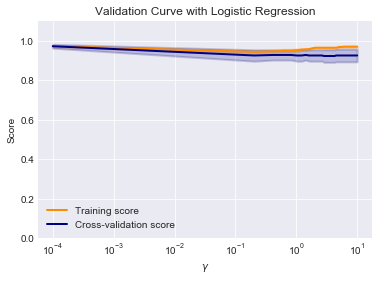

In [55]:
param_range = np.linspace(start=0.0001, stop=10, num=50)
train_scores, test_scores = validation_curve(
    lr, X_train_undersampled, y_train_undersampled, param_name='C', param_range=param_range,
    cv=skf, scoring="recall", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Судя по кривой валидации и обучения можем увидеть слудующее:
- кривая обучения и валидации находятся не далеко друг от друга и ошибка невелика, значит мы можем судить, что наша модель не переобучилась, и не недообучилась
- кривые не сошлись друг к другу, значит добавление новых данных может улучшить модель

### 11. Прогноз для тестовой или отложенной выборке

In [40]:
def plot_precision_recall_curve(precision, recall) :
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()

In [42]:
under_probs = grid_under.predict_proba(X_test_csr)[:, 1]
over_probs = grid_over.predict_proba(X_test_csr)[:, 1]

under_preds = grid_under.predict(X_test_csr)
over_preds = grid_over.predict(X_test_csr)

In [43]:
precision_under, recall_under, _ = precision_recall_curve(y_true=y_test, probas_pred=under_probs, pos_label=1)
precision_over, recall_over, _ = precision_recall_curve(y_true=y_test, probas_pred=over_probs, pos_label=1)

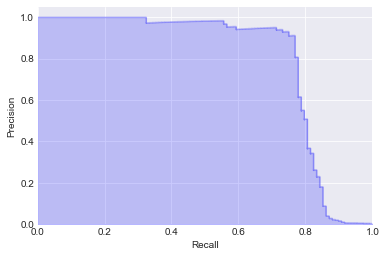

In [44]:
plot_precision_recall_curve(precision_under, recall_under)

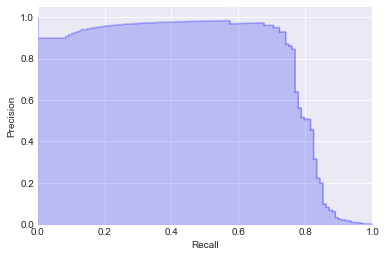

In [45]:
plot_precision_recall_curve(precision_over, recall_over)

In [46]:
print ("Under sampling ROC AUC Score")
print (roc_auc_score(y_true=y_test, y_score=under_probs))
print ("Over sampling ROC AUC Score")
print (roc_auc_score(y_true=y_test, y_score=over_probs))

Under sampling ROC AUC Score
0.9790047503412477
Over sampling ROC AUC Score
0.9796832852656958


In [47]:
print ("Under sampling Recall Score")
print (recall_score(y_true=y_test, y_pred=under_preds))
print ("Over sampling Recall Score")
print (recall_score(y_true=y_test, y_pred=over_preds))

Under sampling Recall Score
1.0
Over sampling Recall Score
0.9351851851851852


Результаты сравнимы с результатами на кросс - валидации, вдобавок, мы можем увидеть что модель имеет хорошую обобщающую способность, т.к. дает хороший результат

### 12. Выводы

- Как можно увидеть, мы добились качества модели по метрике recall в 100%
по ROC AUC score - 0.979

- Это очень хороший результат, так как мы находим все мошеннические транзакции на тестовой выборке, и немного ошибаемся, определяя легальные транзакции как мошеннические.

- Но с точки зрения бизнеса и банковской сферы это не так страшно

- Стоит отметить, что до добавления признака hour, модель работала существенно хуже, что подтверждает гипотезу, о том, что данный признак вносит большой вклад в целевую переменную, и большинство нелегальных транзакций проходят ночью

Прошу обратить внимание, что мы использовали только модель логистической регрессии, и добились хорошего результата. В последующем улучшении нашего решения, можно попробовать использовать другие методы, такие как случайный лес и градиентный бустинг, что возможно даст нам прирост в precision, и оставит тот же recall